# TensorFlow 2 & Keras quickstart for beginners with MNIST

Thomas Cochou

This  introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.
4. Analyse the detail of the predictions
5. Test alternative models (convolution)

It is based on François Chollet [tutorials](https://github.com/fchollet/deep-learning-with-python-notebooks).

Download and install the TensorFlow 2 package. Import TensorFlow into your program:

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

#from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). 
Convert the samples from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

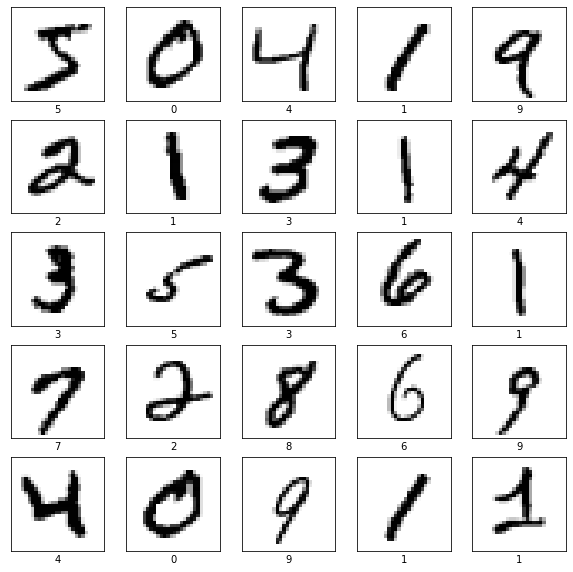

In [ ]:
#plot the 25 first image of the train data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


---
#Questions:

* What is MNIST ? 

La base de données MNIST pour Modified ou Mixed National Institute of Standards and Technology, est une base de données de chiffres écrits à la main.

* What is contained in `x_train`, `y_train`, `x_test`, and `y_test`?

Les données train correspondent aux données d'entrainnements et les données test sont pour le test. 

x correspond aux 60000 images en entrée de 28x28 pixels.

y correspond à chaque possibilité de sortie donc un chiffre de 0 à 9.

* What is the size of these tensors?

La taille du tenseur est de 60000x28x28.

* Why is it necessary to divide `x_train` and `x_test` by 255?

RGB (Red, Green, Blue) are 8 bit each.

The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).

By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).

---

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


---
#Questions
* Explain what are `layers.Flatten` and `layers.Dense` used for?

`layer.Flatten` correspond à la couche d'entrée, elle transforme la matrice de pixels d'entrée en une liste de tous les pixels.

`layers.Dense` correspond à une couche (de n neurones ici 128 et 10) interconnecté avec tout les autres neurones des couches voisines. Chaque couche `Dense` est associée à une fonction d'activation.

* Why the last activation function has to be a softmax?

Softmax donne la probabilité pour chaque entrée de faire partie d'une classe ou d'une autre.

* How is calculated the number of parameter? 

First layer * Second layer + Second layer biases = Second layer parameters

784 * 128 + 128 = 100480

Second layer * Third layer + Third layer biases = Third layer parameters

128 * 10 + 10 = 1290

Second layer parameters + Third layer parameters = Number of parameters

100480 + 1290 = 101770


---

Train and evaluate the model:

In [ ]:
model1.fit(x_train, y_train, epochs=5)

model1.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2535 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1140 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0783 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9856
313/313 - 1s - loss: 0.0743 - accuracy: 0.9767


[0.0743367150425911, 0.9767000079154968]

---
#Question
* What is the difference between the accuracy written after each Epoch and the accuracy written at the end? 

L'Accuracy écrite à la fin correspond au calcul sur les données de test, alors que à chaque époque le calcul est réalisé sur les données d'entrainnement.

---

Compute the predictions based on the trained model

In [ ]:
predictions = model1.predict(x_test)

In [ ]:
predictions[0]
predictions[1]
predictions[2]


array([7.67950269e-07, 9.99122441e-01, 1.54927242e-04, 1.29073715e-05,
       2.55888135e-05, 9.80048935e-05, 1.21993553e-05, 2.59483757e-04,
       3.13158962e-04, 5.22059963e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])
np.argmax(predictions[1])
np.argmax(predictions[2])

1

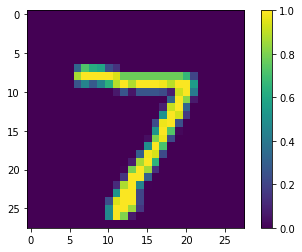

In [ ]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()


---
#Questions
* What is contained in `predictions[0]`?

La probabilité de que la première (n = 0) entrée ait d'appartennir à chaque classe de sortie (0, 1, 2, etc...)

* Check `predictions[1]` and `predictions[2]`
---

We create two plotting functions, have a look and try to understand what they will be used for: 

In [ ]:
#plotting functions
#if the classification is correct, the caption will be blue, otherwise it'll be red
class_names = ['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9']


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


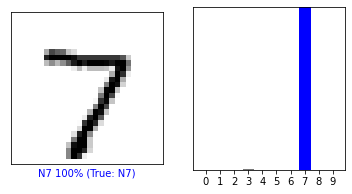

In [ ]:
#plot the image 0 with the probability for each class
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Now we will get the max probability for each prediction and sort them from the lowest to the highest in order to observe the images that have the lowest probabilities. 

In [ ]:
#select only the max probability for each prediction 
probs = np.amax(predictions, axis=1)
probs[0]

0.9963445

In [ ]:
#creat a list of indexes corresponding to the prediction sorted from the lowest to the highest 
indexes = list(range(len(probs)))
indexes.sort(key=probs.__getitem__)

In [ ]:
#print the index of the lowest propability
indexes[0]

6625

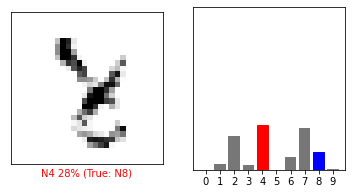

In [ ]:
#plot the image of the test image which has the lowest probability 
i = indexes[0]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

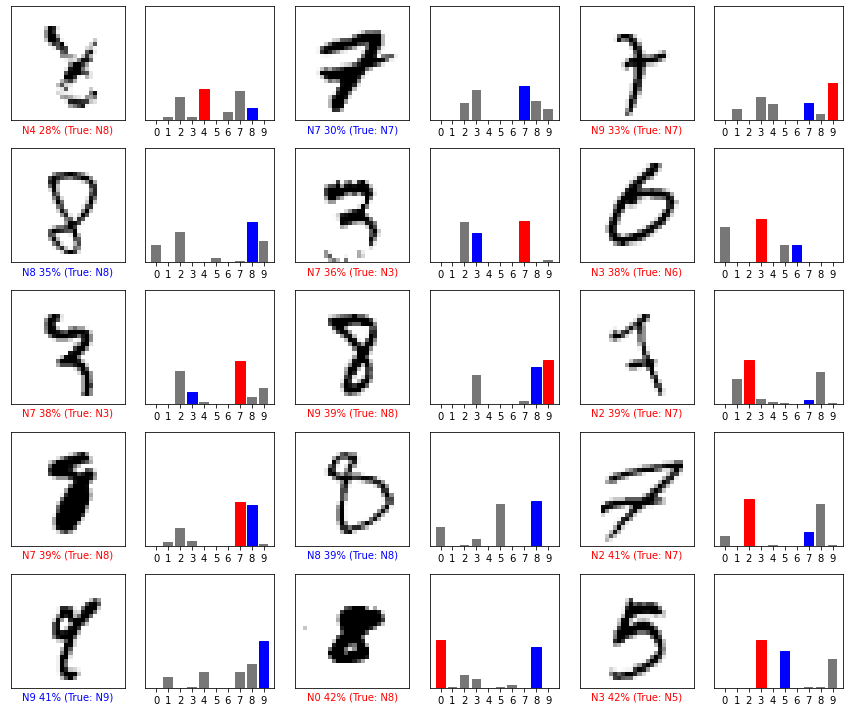

In [ ]:
#plot the 15 images with the lowest probability
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexes[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


---
#Question
* What do you observe ?

L'algorithme hésite entre différentes valeurs selon leurs probabilités et sélectionne la sortie la plus probable. Cependant certaines sortie ont une probabilité très proche, ce n'est donc pas toujours correct.

---

In [ ]:
# count the number of mistakes
decision =  np.argmax(predictions,axis=1)
verif = decision == y_test
10000-sum(verif)

233

---
#Optional question
* Plot the 15 worst errors (high probability but wrong decision)
---

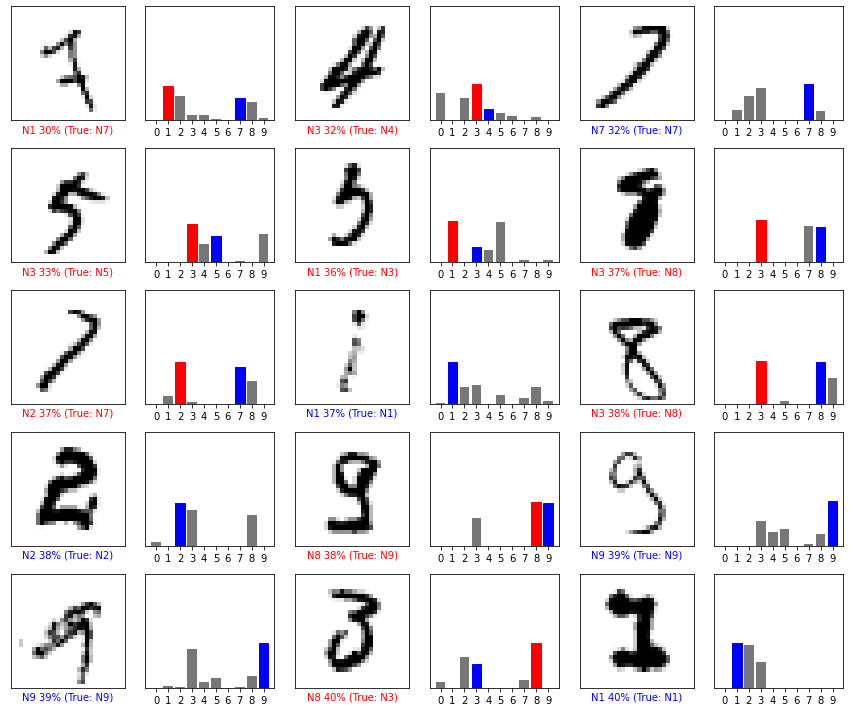

In the next part we will create a convolutional model by using `Conv2D`.
We also introduce a `Dropout` layer. 

In [ ]:
#For convolution we need (60000,28,28,1)
train_images = x_train.reshape((60000, 28, 28, 1))
test_images = x_test.reshape((10000,28,28,1))

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_11 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


---
#Question
* Why are there so many parameters?

En entrée nous passons de 28x28=784 valeurs à 26x26x32=21632
Chaque image diminue de 1x1 pixels qui correspond au cadre de l'image perdu lors de la convolution (voir page 5 `Introduction to Deep Learning`). Et 32 correspond au nombre de kernel appliqués aux images.
Ainsi nous avons bien plus d'entrées et par conséquent, bien plus de paramètres.

* What will be the impact on the training?

L'entrainnement va être plus coûteux mais plus efficace.

---

In [ ]:
model2.fit(train_images, y_train, epochs=5)

model2.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1561 - accuracy: 0.9528
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0552 - accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0349 - accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0229 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0177 - accuracy: 0.9940
313/313 - 1s - loss: 0.0537 - accuracy: 0.9847


[0.05368081480264664, 0.9847000241279602]

We introduce maxpooling to reduce the size of the model.

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.MaxPool2D((2,2)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               147584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

In [ ]:
model3.fit(train_images, y_train, epochs=5)

model3.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2142 - accuracy: 0.9355
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0770 - accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0570 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0453 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0390 - accuracy: 0.9877
313/313 - 1s - loss: 0.0349 - accuracy: 0.9884


[0.03490782156586647, 0.9883999824523926]

We can also try to stack convolutional and pooling layers

In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                     
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 32)              

In [ ]:
model4.fit(train_images, y_train, epochs=5)

model4.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2938 - accuracy: 0.9069
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1039 - accuracy: 0.9691
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0760 - accuracy: 0.9769
Epoch 4/5
 274/1875 [===>..........................] - ETA: 8s - loss: 0.0545 - accuracy: 0.9839

---
#Questions
* What do you observe? 

La précision est toujours présente malgrès le manque de paramètres.

* Why similar performances can be obtained with a much smaller model?

Les caractéristiques les plus importantes sont encore présentes malgré les pertes.

---

One of the best model is the following one:

In [ ]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 5, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 5, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.summary()

In [ ]:
model5.fit(train_images, y_train, epochs=5)

model5.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1581 - accuracy: 0.9508
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0233 - accuracy: 0.9923
313/313 - 1s - loss: 0.0218 - accuracy: 0.9927


[0.021773410961031914, 0.9926999807357788]

If you have free time, try to build your own model, change some parmeters, continue to check the content of the dataset, etc.

